In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import time 
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from nltk.stem import PorterStemmer 
import nltk 


In [10]:
data = pd.read_csv("YoutubeVideoDataset.csv")
data.head(10)

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...
5,Blippi Tours the Chocolate Factory | Learn abo...,/watch?v=uSIb-Wbyx6Y,Food,After Blippi eats his vegetables Blippi takes ...
6,EGYPT: Vegetarian food | Mobile Sim | Indian S...,/watch?v=Gozaqmg6hmk,Food,"http://bit.ly/subscribeMT\nIn this video, you ..."
7,Chinese Street Food Liuhe Tourist Night Market,/watch?v=H0xKYgUX3zI,Food,Trying many different kinds of chinese street ...
8,India's Biggest food FESTIVAL | food truck fes...,/watch?v=NpOVNb1keoc,Food,Alright guys i hope you liked my video.\nAbout...
9,Street Food in Madagascar's Biggest City!!! Ze...,/watch?v=OXHHNBVt0pw,Food,🎥VILLAGE FOOD IN MADAGASCAR! » https://youtu.b...


In [11]:
print(data.shape)
data.isnull().values.any()

(11211, 4)


True

In [12]:
data = data.dropna()
print(data.isnull().values.any())

False


In [14]:
Category = data['Category'].value_counts()
print(Category.shape)
Category

(6,)


Category
travel blog           2200
Science&Technology    2074
Food                  1828
manufacturing         1699
Art&Music             1682
History               1645
Name: count, dtype: int64

Preprocessing Removing Url ,Remove email address, remove special character , word stemming 

In [15]:
stop_words = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

def preprocessing(total_text , index, column):
    if type(total_text) is not int:
        string = ""
        url_pattern = r'(((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?))'
        total_text = re.sub(url_pattern, '' , total_text)
        email_pattern = r'[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+'
        total_text=re.sub(email_pattern, '',total_text)
        total_text = re.sub('\s+',' ', total_text)
        total_text = total_text.lower()
        for word in total_text.split():
            if not word in stop_words:
                word=(sno.stem(word))
                string += word + " "
        data[column][index] = string 

In [16]:
data.head(10)

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...
5,Blippi Tours the Chocolate Factory | Learn abo...,/watch?v=uSIb-Wbyx6Y,Food,After Blippi eats his vegetables Blippi takes ...
6,EGYPT: Vegetarian food | Mobile Sim | Indian S...,/watch?v=Gozaqmg6hmk,Food,"http://bit.ly/subscribeMT\nIn this video, you ..."
7,Chinese Street Food Liuhe Tourist Night Market,/watch?v=H0xKYgUX3zI,Food,Trying many different kinds of chinese street ...
8,India's Biggest food FESTIVAL | food truck fes...,/watch?v=NpOVNb1keoc,Food,Alright guys i hope you liked my video.\nAbout...
9,Street Food in Madagascar's Biggest City!!! Ze...,/watch?v=OXHHNBVt0pw,Food,🎥VILLAGE FOOD IN MADAGASCAR! » https://youtu.b...


Test , train and Cross validation SPilit


In [17]:
y_true = data['Category'].values

X_train, test_df ,y_train, y_test = train_test_split(data, y_true,
                                                     stratify=y_true, test_size=0.2)
train_df ,cv_df ,y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train , test_size=0.2)

In [18]:
print('Number of  data points in train data', train_df.shape[0])
print('number of data points in test data:', test_df.shape[0])
print('Number of data points in cv data',cv_df.shape[0])

Number of  data points in train data 7121
number of data points in test data: 2226
Number of data points in cv data 1781


In [20]:
X_trainCategory = train_df['Category'].value_counts()
print(X_trainCategory)
print('Distribution of y in train')
plt.figure(figsize=(8,8))
sns.barplot(X_trainCategory.index, X_trainCategory.values, alpha=0.8)
plt.title('Distribution of y in train')
plt.ylabel('data point per class')
plt.xlabel('Class')
plt.xticks(rotation=90)
plt.show()

test_dfCategory=test_df['Category'].value_counts()
print(test_dfCategory)
print('Distribution of y in test')
plt.figure(figsize=(8,8))
sns.barplot(test_dfCategory.index,test_dfCategory.values, alpha=0.8)
plt.title('Distribution of y in test')
plt.ylabel('data point per class')
plt.xlabel('Class')
plt.xticks(rotation=90)
plt.show()

cv_dfCategory=cv_df['Category'].value_counts()
print(cv_dfCategory)
print('Distribution of y in cv')
plt.figure(figsize=(8,8))
sns.barplot(cv_dfCategory.index,cv_dfCategory.values, alpha=0.8)
plt.title('Distribution of y in cv')
plt.ylabel('data point per class')
plt.xlabel('Class')
plt.xticks(rotation=90)
plt.show()

Category
travel blog           1408
Science&Technology    1327
Food                  1169
manufacturing         1087
Art&Music             1077
History               1053
Name: count, dtype: int64
Distribution of y in train


TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 800x800 with 0 Axes>

In [21]:
x_tr=train_df['Description']
x_test=test_df['Description']
x_cv=cv_df['Description']

In [22]:
bow = CountVectorizer()
x_tr_uni = bow.fit_transform(x_tr)
x_test_uni= bow.transform(x_test)
x_cv_uni= bow.transform(x_cv)

In [23]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
x_tr_tfidf = tf_idf_vect.fit_transform(x_tr)
x_test_tfidf = tf_idf_vect.transform(x_test)
x_cv_tfidf = tf_idf_vect.transform(x_cv)

In [24]:
def plotPrecisionRecall(y_test,y_pred):
    C = confusion_matrix(y_test, y_pred)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = ['Art&Music','Food','History','Sci&Tech','Manu','TravelBlog']


    print("-"*20, "Precision matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    # representing B in heatmap format
    print("-"*20, "Recall matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Machine Learning 

Linear SVM



Accuracy on test set: 90.611%
Precision on test set: 0.905
Recall on test set: 0.905
F1-Score on test set: 0.904
-------------------- confusion matrix --------------------


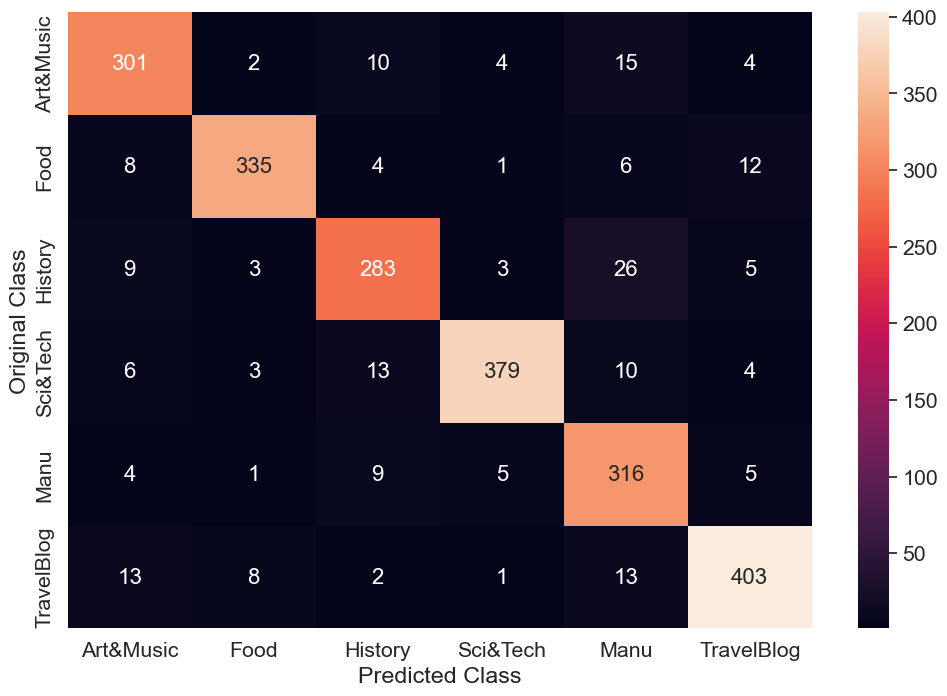

-------------------- Precision matrix --------------------


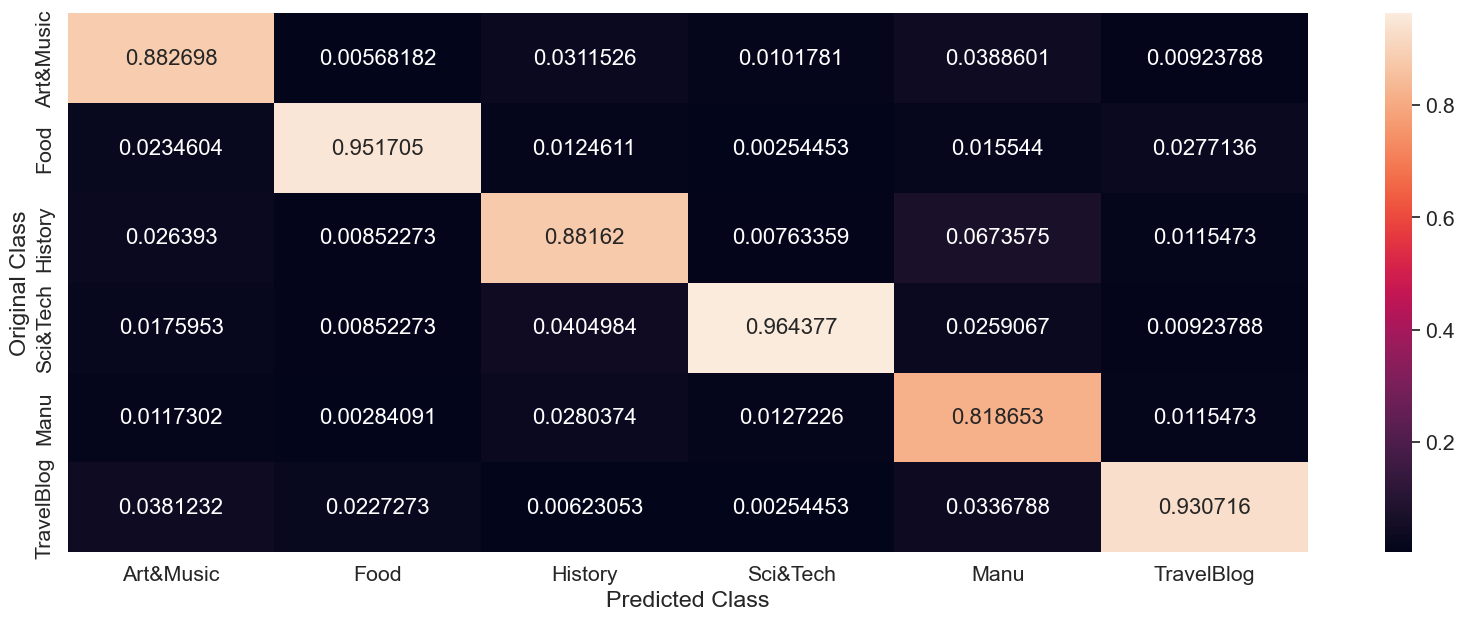

-------------------- Recall matrix --------------------


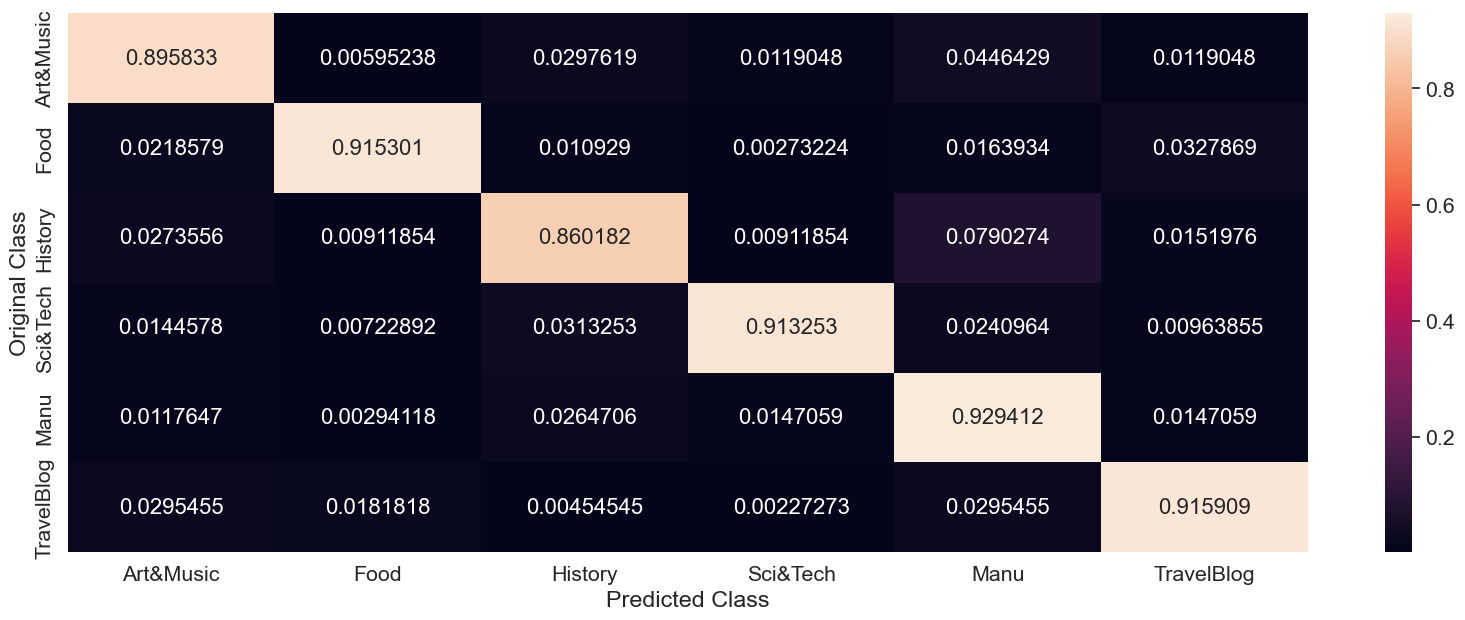

In [25]:
clf = SGDClassifier(loss = 'hinge', alpha = 0.01, class_weight='balanced', learning_rate='optimal',eta0=0.001, n_jobs = -1) 
clf.fit(x_tr_uni,y_train)
y_pred = clf.predict(x_test_uni)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))

print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(12,8))
matrix=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(matrix)
sns.set(font_scale=1.4)#for label size
labels = ['Art&Music','Food','History','Sci&Tech','Manu','TravelBlog']
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()
plotPrecisionRecall(y_test,y_pred)

Conclusion:
Travel Blog-407 are correctly classified out of 440 

Precision of 91.4% and Recall of 88.981

Science and Technology-377 are correctly classified out of 415 Precision of 96.2% and Recall of 90.9%

Food-333 are correctly classified out of 366 Precision of 82.4 % and Recall of 89.9%

Manufacturing-310 are correctly classified out of 340 Precision of 95.9% and Recall of 90.8%

Art & Music-229 are correctly classified out of 336 Precision of 88.0% and Recall of 91.1%

History-296 are correctly classified out of 329 Precision of 90.6% and Recall of 92.5%

Accuracy on test set: 91.824%
Precision on test set: 0.917
Recall on test set: 0.917
F1-Score on test set: 0.917
-------------------- confusion matrix --------------------


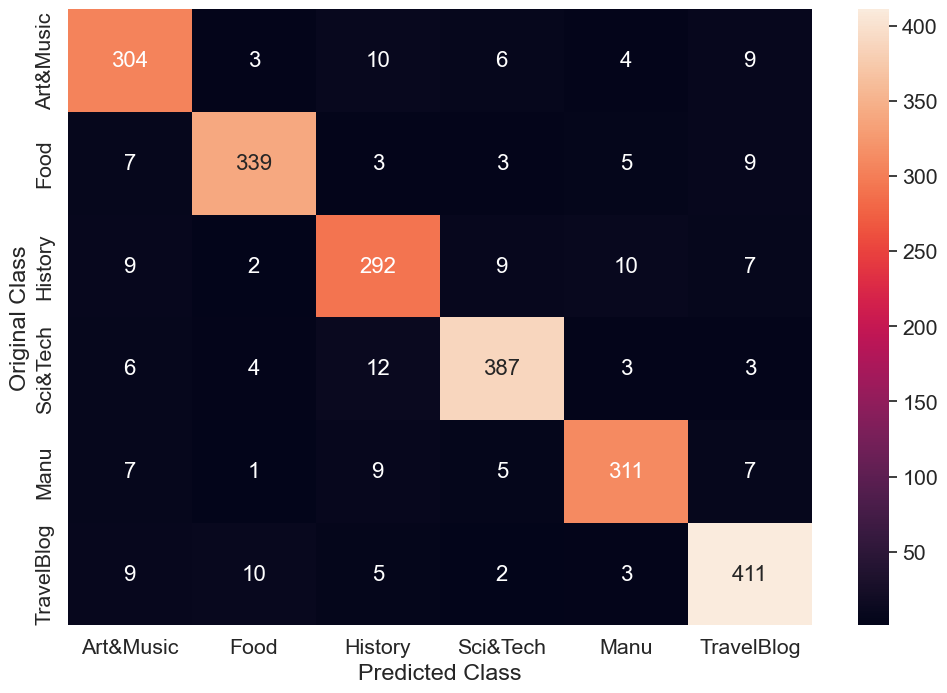

-------------------- Precision matrix --------------------


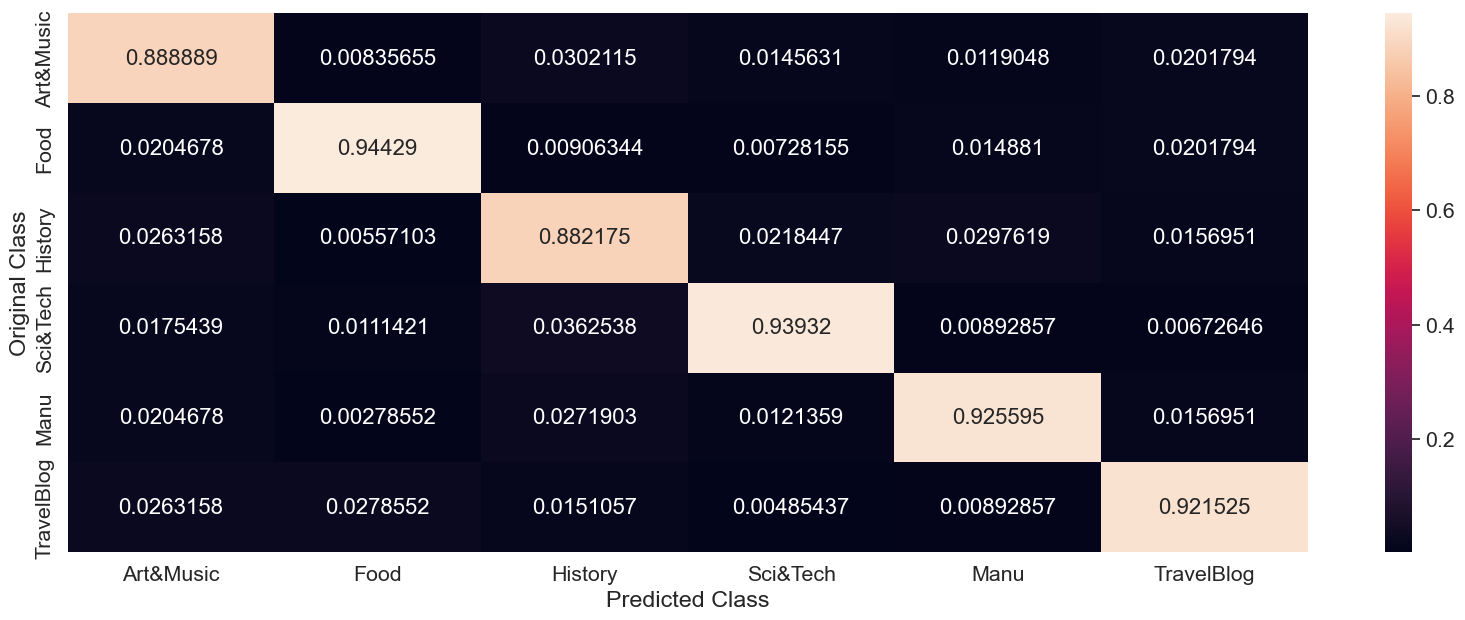

-------------------- Recall matrix --------------------


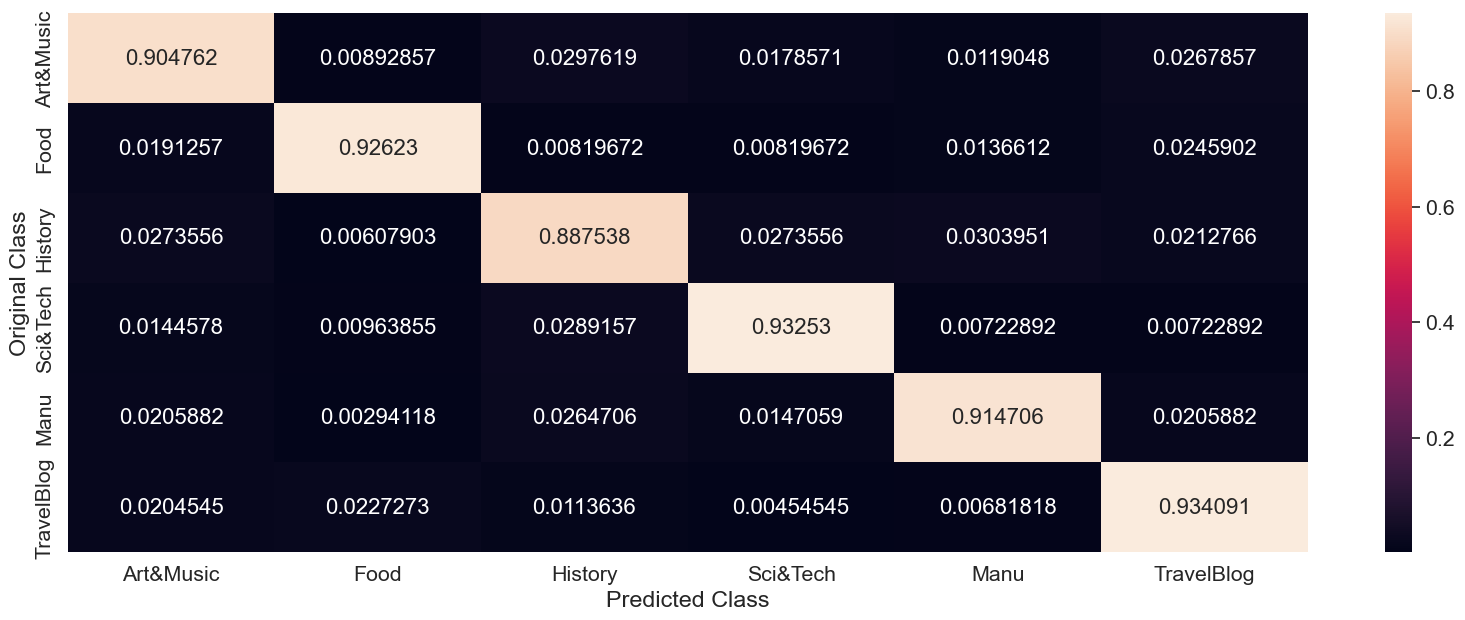

In [26]:
clf = SGDClassifier(loss = 'hinge', alpha =0.0001, class_weight='balanced', learning_rate='optimal',eta0=0.001, n_jobs = -1) 
clf.fit(x_tr_tfidf,y_train)
y_pred = clf.predict(x_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))

print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(12,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(6),range(6))
sns.set(font_scale=1.4)#for label size
labels = ['Art&Music','Food','History','Sci&Tech','Manu','TravelBlog']
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()
plotPrecisionRecall(y_test,y_pred)

Conclusion

Travel Blog-416 are correctly classified out of 440 Precision of 90.9% and Recall of 89.2%

Science and Technology-384 are correctly classified out of 415 Precision of 96.3% and Recall of 92.8%

Food-340 are correctly classified out of 366 Precision of 86.6 % and Recall of 90.8%

Manufacturing-312 are correctly classified out of 340 Precision of 95.5% and Recall of 92.5%

Art & Music-300 are correctly classified out of 336 Precision of 90.9% and Recall of 91.7%

History-299 are correctly classified out of 329 Precision of 91.8% and Recall of 94.5%

In [27]:
y_true = data['Category'].values
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2)

In [28]:
x_tr=X_train['Description']
x_test=test_df['Description']

In [29]:
bow = CountVectorizer()
x_tr_uni = bow.fit_transform(x_tr)
x_test_uni= bow.transform(x_test)


In [30]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
x_tr_tfidf = tf_idf_vect.fit_transform(x_tr)
x_test_tfidf = tf_idf_vect.transform(x_test)

Accuracy on test set: 85.040%
Precision on test set: 0.851
Recall on test set: 0.848
F1-Score on test set: 0.849
-------------------- confusion matrix --------------------


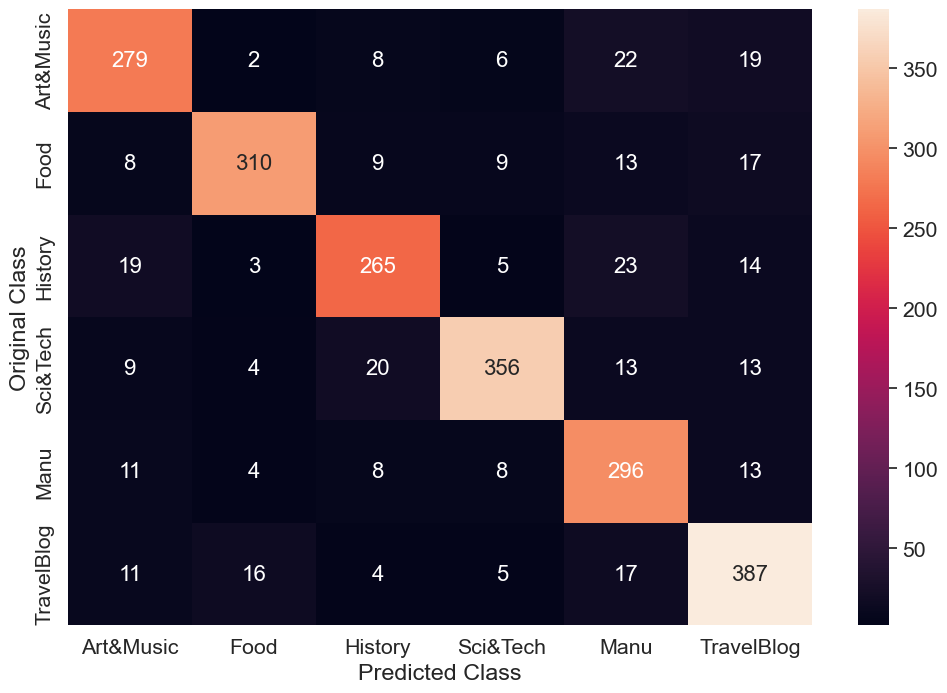

-------------------- Precision matrix --------------------


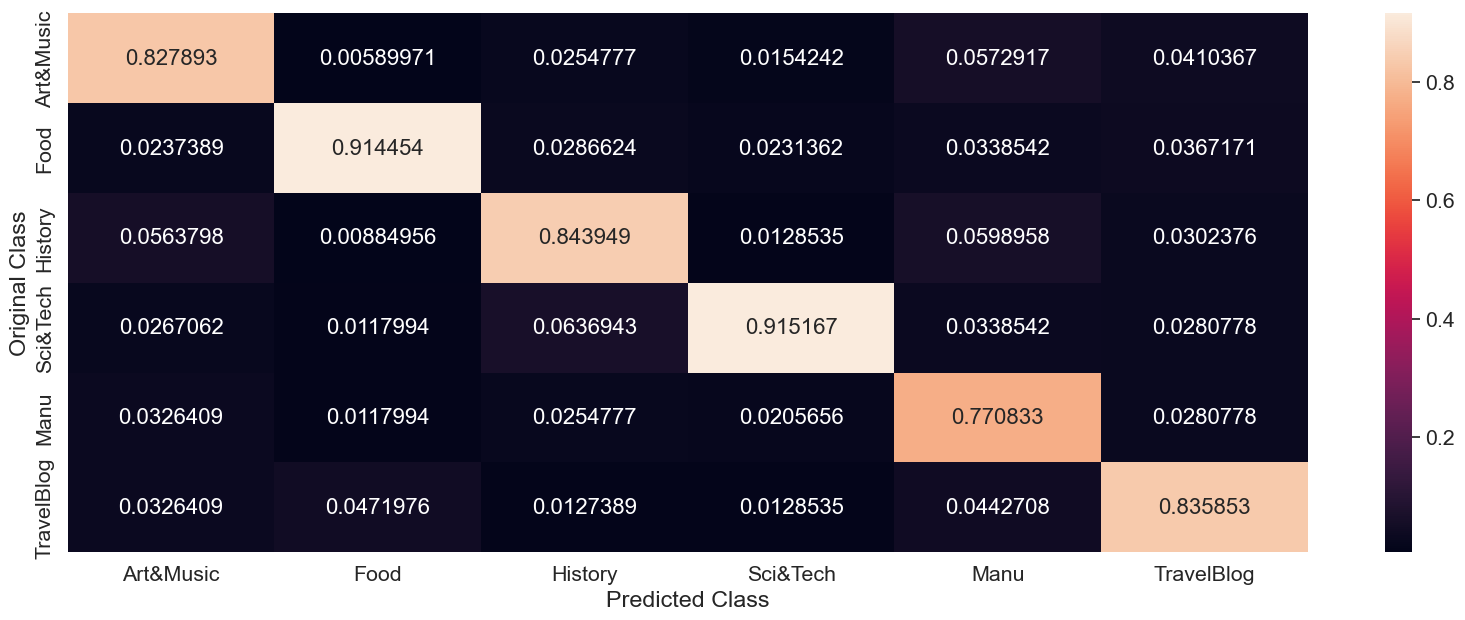

-------------------- Recall matrix --------------------


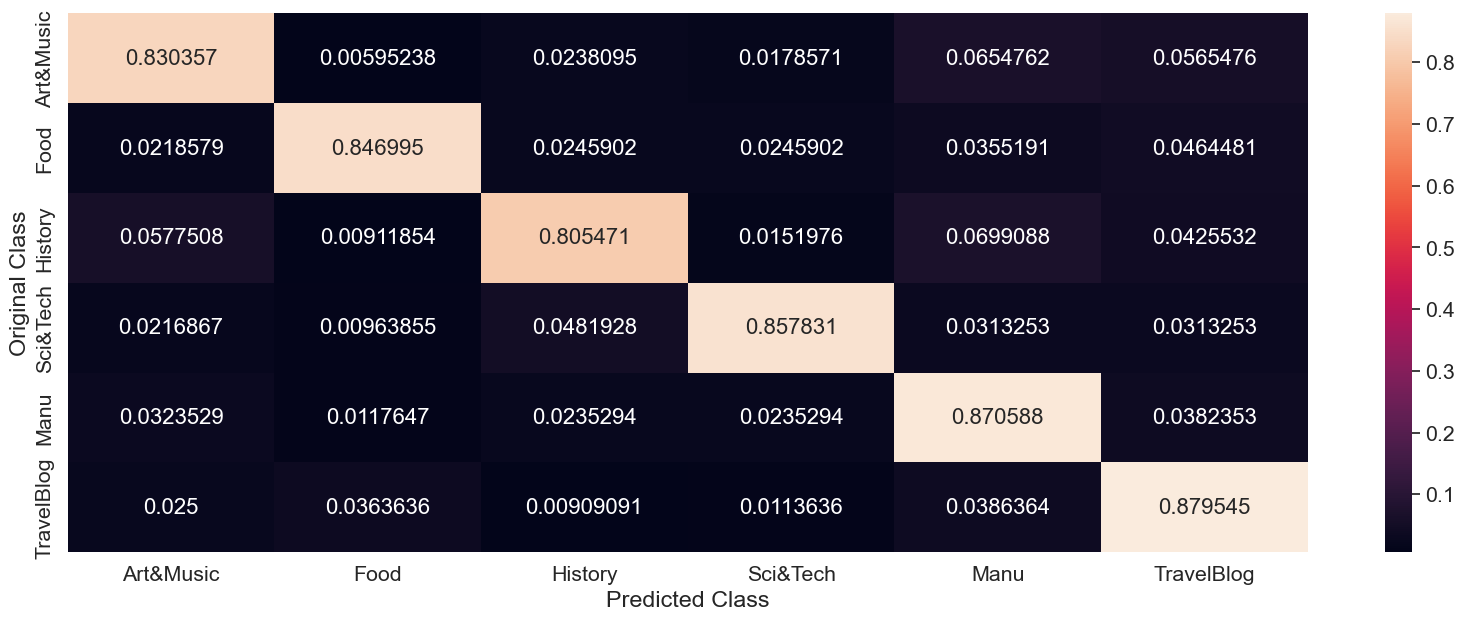

In [33]:
RF= RandomForestClassifier(n_estimators=16,max_depth=130)
RF.fit(x_tr_uni,y_train)
y_pred =RF.predict(x_test_uni)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(12,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(6),range(6))
sns.set(font_scale=1.4)#for label size
labels = ['Art&Music','Food','History','Sci&Tech','Manu','TravelBlog']
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()
plotPrecisionRecall(y_test,y_pred)

ValueError: could not convert string to float: 'Village food factory'